## First steps with sckit-learn - training a perceptron

In [1]:
import os, sys
sys.path.append(os.path.join(os.getcwd(), ".."))

### Load iris dataset

In [2]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [3]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [4]:
print("Class labels: ", np.unique(y))

Class labels:  [0 1 2]


### Split dataset into train and test sample stratified by target

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [7]:
print("Labels counts in y: ", np.bincount(y))
print("Labels counts in y_train: ", np.bincount(y_train))
print("Labels counts in y_test: ", np.bincount(y_test))

Labels counts in y:  [50 50 50]
Labels counts in y_train:  [35 35 35]
Labels counts in y_test:  [15 15 15]


### Scale features

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc = StandardScaler()
sc.fit(X_train) # estimate the paramters u (sample mean) and q (standard deviation) for each feature

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
X_train_std = sc.transform(X_train) # statandardize the training data using estimated parameters.
X_test_std = sc.transform(X_test)

In [11]:
print("mean: ", np.mean(X_train[:, 0]), ", ", np.mean(X_train[:, 1]))
print("sc.mean_: ", sc.mean_)

mean:  3.78952380952 ,  1.19619047619
sc.mean_:  [ 3.78952381  1.19619048]


In [12]:
print("std: ", np.var(X_train[:, 0]), ", ", np.var(X_train[:, 1]))
print("sc.var_: ", sc.var_)

std:  3.21484263039 ,  0.583795011338
sc.var_:  [ 3.21484263  0.58379501]


### Train a perceptron model - OvR

In [13]:
from sklearn.linear_model import Perceptron

In [14]:
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=40, n_iter=None, n_jobs=1, penalty=None, random_state=1,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [15]:
y_pred = ppn.predict(X_test_std)

In [16]:
print("Misclassified samples: %d" % (y_test != y_pred).sum())
print("Misclassification error: %.2f%%" % (100*(y_test != y_pred).sum()/y_pred.shape[0]))

Misclassified samples: 3
Misclassification error: 6.67%


In [17]:
print("Accuracy: %.2f" % ppn.score(X_test_std, y_test))

Accuracy: 0.93


In [18]:
from utils import plot_decision_regions
import matplotlib.pyplot as plt

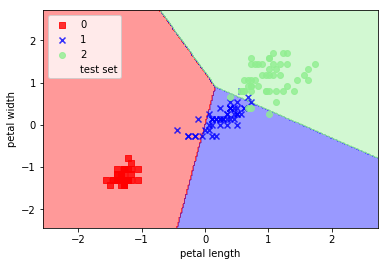

In [19]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(
    X=X_combined_std, y=y_combined, classifier=ppn,
    test_idx=range(105, 150)
)
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend(loc="upper left")
plt.show()

### Comparet sc.Perceptron with MultiClassClassifier (CH02)

In [20]:
import ch02.models as ch02

In [21]:
mcppn = ch02.MultiClassClassifier(clf=ch02.Perceptron, n_iter=100, eta=0.001, random_state=1)

In [22]:
mcppn.fit(X_train_std, y_train)
y_pred2 = mcppn.predict(X_test_std)

In [23]:
print("Misclassified samples: %d" % (y_test != y_pred2).sum())
print("Misclassification error: %.2f%%" % (100*(y_test != y_pred2).sum()/y_pred2.shape[0]))

Misclassified samples: 45
Misclassification error: 100.00%


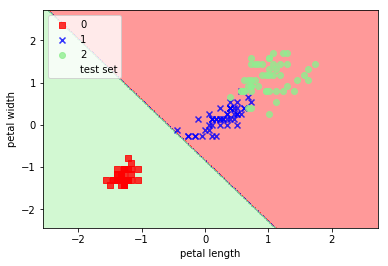

In [24]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(
    X=X_combined_std, y=y_combined, classifier=mcppn,
    test_idx=range(105, 150)
)
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend(loc="upper left")
plt.show()

## Modeling class probabilities via logistic regression

In [25]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

In [26]:
def cost_1(z):
    return -np.log(sigmoid(z))
def cost_0(z):
    return -np.log(1 - sigmoid(z))

In [27]:
z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)
c1 = [ cost_1(x) for x in z ]
c0 = [ cost_0(x) for x in z ]

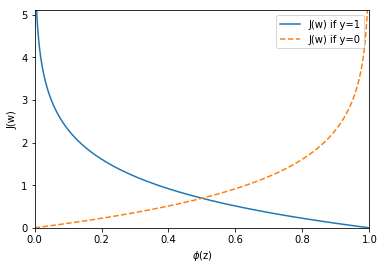

In [28]:
plt.plot(phi_z, c1, label="J(w) if y=1")
plt.plot(phi_z, c0, linestyle="--", label="J(w) if y=0")
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel("$\phi$(z)")
plt.ylabel("J(w)")
plt.legend(loc="best")
plt.show()

### Gradient descent - update exmplae

In [29]:
w = np.array([1, 1, 1])
X = np.array([[1, 0, 1], [1, 1, 0]])
y = np.array([1, 0])
eta = 1

In [30]:
z = X.dot(w)
yhat = sigmoid(z)
errors = y - yhat
w = w + eta * X.T.dot(errors)

### Logistinc regression implementation test

In [31]:
from ch03.models import LogisticRegresionGD

In [32]:
# select subset coresponding to two classes: 0, 1
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

In [33]:
lrgd = LogisticRegresionGD(eta=0.001, n_iter=1000, random_state=1, lambda_=0)
lrgd.fit(X_train_01_subset, y_train_01_subset)
lrgd.weights

array([-4.65465128,  1.29936645,  1.99505901])

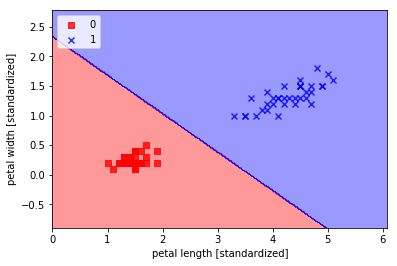

In [34]:
plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)
plt.xlabel("petal length [standardized]")
plt.ylabel("petal width [standardized]")
plt.legend(loc="upper left")
plt.show()

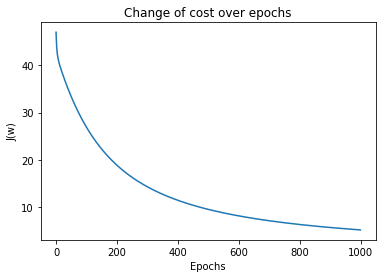

In [35]:
plt.plot(range(lrgd.n_iter), lrgd.cost_)
plt.xlabel("Epochs")
plt.ylabel("J(w)")
plt.title("Change of cost over epochs")
plt.show()

### Training a logistic regression model with sckit-learn

In [36]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.00, random_state=1)
lr.fit(X_train_std, y_train)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

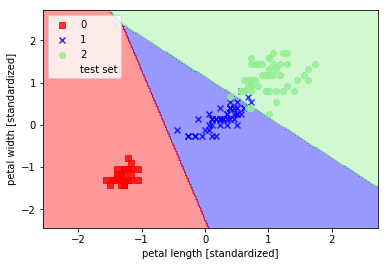

In [37]:
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel("petal length [standardized]")
plt.ylabel("petal width [standardized]")
plt.legend(loc="upper left")
plt.show()

## Regularization

In [38]:
weights, params = [], []
accuracy = []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
    accuracy.append(lr.score(X_test_std, y_test))
weights = np.array(weights)

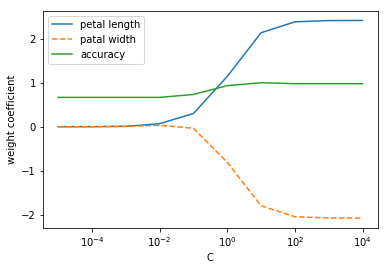

In [39]:
plt.plot(params, weights[:, 0], label="petal length")
plt.plot(params, weights[:, 1], label="patal width", linestyle="--")
plt.plot(params, accuracy, label="accuracy")
plt.ylabel("weight coefficient")
plt.xlabel("C")
plt.legend(loc="upper left")
plt.xscale("log")
plt.show()

In [40]:
X_train_std_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

In [41]:
weights, params = [], []
for c in np.arange(0, 5):
    lr = LogisticRegresionGD(eta=0.001, n_iter=100, random_state=1, lambda_=10.**c)
    lr.fit(X_train_std_01_subset, y_train_01_subset)
    weights.append(lr.weights)
    params.append(10.**c)
weights = np.array(weights)

/media/kuba/Data/Projects/PML/ch03/../ch03/models.py:42: RuntimeWarning: divide by zero encountered in log
  return -y.dot(np.log(output)) - (1-y).dot(np.log(1-output)) + self.lambda_*self.w_[1:].T.dot(self.w_[1:])


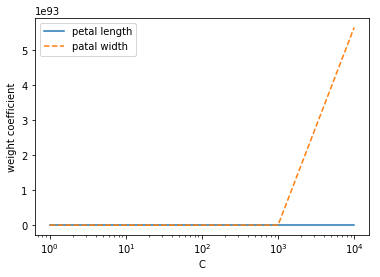

In [42]:
plt.plot(params, weights[:, 0], label="petal length")
plt.plot(params, weights[:, 1], label="patal width", linestyle="--")
plt.ylabel("weight coefficient")
plt.xlabel("C")
plt.legend(loc="upper left")
plt.xscale("log")
plt.show()

## Support Vector Machines

In [43]:
from sklearn.svm import SVC

svm = SVC(kernel="linear", C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

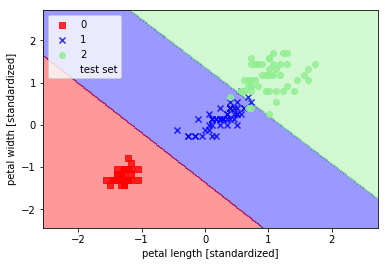

In [44]:
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel("petal length [standardized]")
plt.ylabel("petal width [standardized]")
plt.legend(loc="upper left")
plt.show()

### Kernel methods

In [45]:
np.random.seed(1)

X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

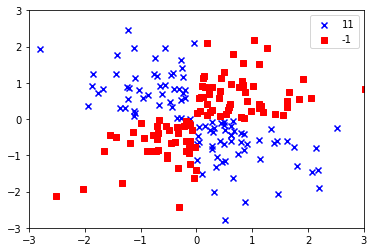

In [46]:
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c="b", marker="x", label="11")
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c="r", marker="s", label="-1")
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc="best")
plt.show()

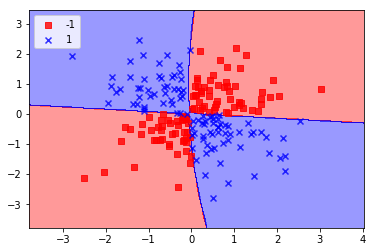

In [47]:
svm = SVC(kernel="rbf", random_state=1, gamma=0.01, C=100000000.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc="upper left")
plt.show()

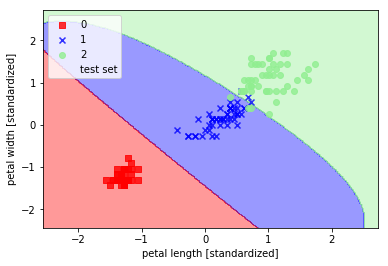

In [48]:
svm = SVC(kernel="rbf", random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel("petal length [standardized]")
plt.ylabel("petal width [standardized]")
plt.legend(loc="upper left")
plt.show()

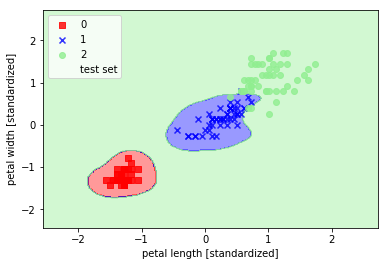

In [49]:
svm = SVC(kernel="rbf", random_state=1, gamma=10.0, C=10.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel("petal length [standardized]")
plt.ylabel("petal width [standardized]")
plt.legend(loc="upper left")
plt.show()

### Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

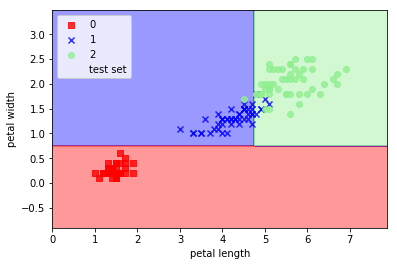

In [52]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105, 150))
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend(loc="upper left")
plt.show()

In [53]:
tree.score(X_test, y_test)

0.9555555555555556

### Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
forest = RandomForestClassifier(criterion="gini", n_estimators=100, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

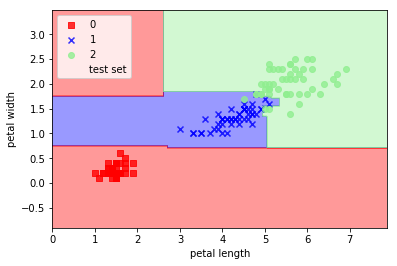

In [56]:
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105, 150))
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend(loc="upper left")
plt.show()

In [57]:
forest.score(X_test, y_test)

0.97777777777777775

### K-nearest neighbors

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
knn = KNeighborsClassifier(n_neighbors=10, p=2, metric="minkowski")
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

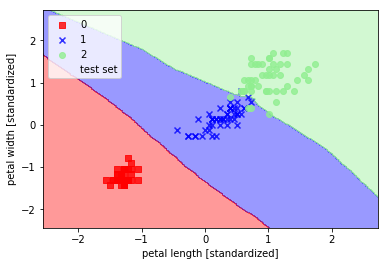

In [69]:
plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105, 150))
plt.xlabel("petal length [standardized]")
plt.ylabel("petal width [standardized]")
plt.legend(loc="upper left")
plt.show()

In [70]:
knn.score(X_test_std, y_test)

0.97777777777777775